<a href="https://colab.research.google.com/github/KevinHTrinh/EmojiClassifier/blob/main/Emoji_Classifier_Kevin_Trinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emoji Classifier

In this project we will be classifying emojis!


**Run the code cell below** to import the necessary packages.

In [ ]:
import os                        # for os.path.exists
import json                      # for loading metadata
import urllib.request            # for downloading remote files 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing

# Matplotlib might complain that a lot of figures are open, but suppress that warning.
plt.rcParams.update({'figure.max_open_warning': 0})

**Run the code cell below** to define some utility functions for fetching data and for processing images.

In [ ]:
def download(remoteurl: str, localfile: str):
    """
    Download remoteurl to localfile, unless localfile already exists.
    Returns the localfile string.
    """
    if not os.path.exists(localfile):
        print("Downloading %s..." % localfile)
        filename, headers = urllib.request.urlretrieve(remoteurl, localfile)
    return localfile

def rgba_to_rgb(image):
    """
    Converts image from RGBA format (H,W,4) to RGB format (H,W,3).
    Returns the new RGB image.
    """
    assert image.ndim == 3, "Expected 3-dimensional array"
    assert image.shape[2] == 4, "Expected 4 colour channels"
    rgb, a = np.split(image, [3], axis=2)  # Split into (H,W,3) and (H,W,1)
    return a*rgb + (1-a)                   # Apply alpha blending to get RGB

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 1 &mdash; Downloading emoji metadata and images

The image data and corresponding metadata that you need for this assignment is available from [github.com/imcal/emoji-data](https://github.com/iamcal/emoji-data), where you can also find a description of the data. The specific files you'll need are only:
* *emoji.json*
* *sheets-clean/sheet_{vendor}_{size}_clean.png*

where *{vendor}* is one of *{apple, facebook, google, twitter}* and *{size}* is the pixel resolution. You'll need emojis from all four vendors, but only the small *16x16* pixel versions (to make training faster). However, do NOT download the files manually.

<div style="border-bottom: 1px solid black;"></div>

### *1a &mdash;  Code to download the files*

Use the *download* function defined above to fetch the five files *procedurally*. 

*Note:* When you visit a Github URL in your browser, Github normally returns an HTML file for rendering in your web browser. To ask Github for an actual raw file (instead of the web page for displaying that file) you must use special URLs. If you view a file in your web browser https://github.com/iamcal/emoji-data/{path_to_file} then you should use URL https://github.com/iamcal/emoji-data/raw/master/{path_to_file}.

In [ ]:
EMOJI_SIZE = 16
VENDOR = ['apple', 'facebook', 'google', 'twitter']
download('https://github.com/iamcal/emoji-data/raw/master/emoji.json', 'emoji.json')

for name in VENDOR:
    sheet_name = name + '_'+ str(EMOJI_SIZE) + '_clean.png'
    path = 'https://github.com/iamcal/emoji-data/raw/master/sheets-clean/sheet_' + sheet_name
    download(path, sheet_name)

<div style="border-bottom: 1px solid black;"></div>

### *1b &mdash;  Loading and inspecting the emoji metadata*

The emoji metadata is contained in a JSON file, which Python's **[json](https://docs.python.org/3/library/json.html)** module can easily load and parse for you.

**Write code** to load the *emoji.json* file, then display the metadata for the first emoji (index 0) so that you can see an example. It should have short name '*hash*'.

In [ ]:
import json
EMOJI_METADATA = json.load(open("./emoji.json"))
print(EMOJI_METADATA[0])

{'name': 'HASH KEY', 'unified': '0023-FE0F-20E3', 'non_qualified': '0023-20E3', 'docomo': 'E6E0', 'au': 'EB84', 'softbank': 'E210', 'google': 'FE82C', 'image': '0023-fe0f-20e3.png', 'sheet_x': 0, 'sheet_y': 0, 'short_name': 'hash', 'short_names': ['hash'], 'text': None, 'texts': None, 'category': 'Symbols', 'sort_order': 135, 'added_in': '0.6', 'has_img_apple': True, 'has_img_google': True, 'has_img_twitter': True, 'has_img_facebook': False}


**Writing code** to find the index of the emoji having short name *'laughing'*, then display its metadata (the *dict* object). Do not use the *sort_order* field of the emoji metadata, it is not relevant to this project.

In [ ]:
def find_short_name(short_name):
    for i, emoji in enumerate(EMOJI_METADATA):
        if emoji["short_name"] == short_name:
            return i

META_LAUGHING = find_short_name('laughing')

<div style="border-bottom: 1px solid black;"></div>

### *1c &mdash;  Loading and inspecting the emoji image data*

The emoji image data is contained in PNG files, which Matplotlib's **[imread](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.imread.html)** function can load as a Numpy array. The image format is RGBA (*red*, *green*, *blue*, *alpha*) where *alpha* determines the opacity of each pixel.

**Writing code** to load the four emoji sheet images. The list of images should be in order *{apple,facebook,google,twitter}*.

In [ ]:
IMAGES = []

for name in VENDOR:
    sheet_name = name + '_'+ str(EMOJI_SIZE) + '_clean.png'
    IMAGES.append(plt.imread(sheet_name))

**Writing code** to plot each vendor's sheet image. Generate four separate plots, where the title of each plot should be "*vendor* (*height*, *width*, *channels*)" where *height* and *width* are the size of the sheet and *channels* is the number of colour channels.


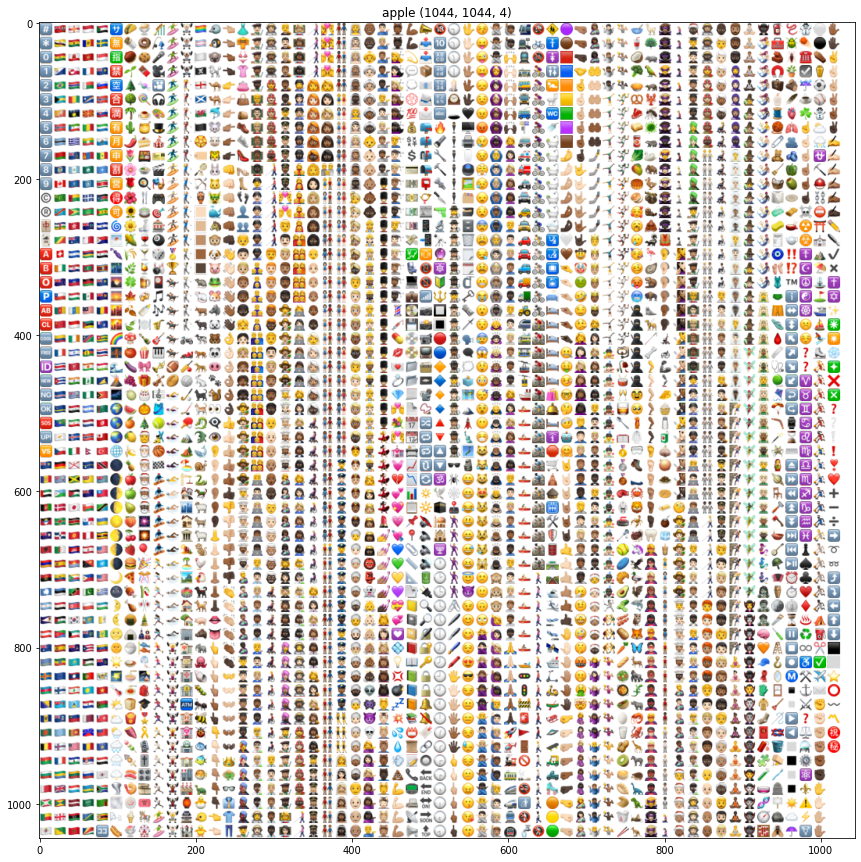

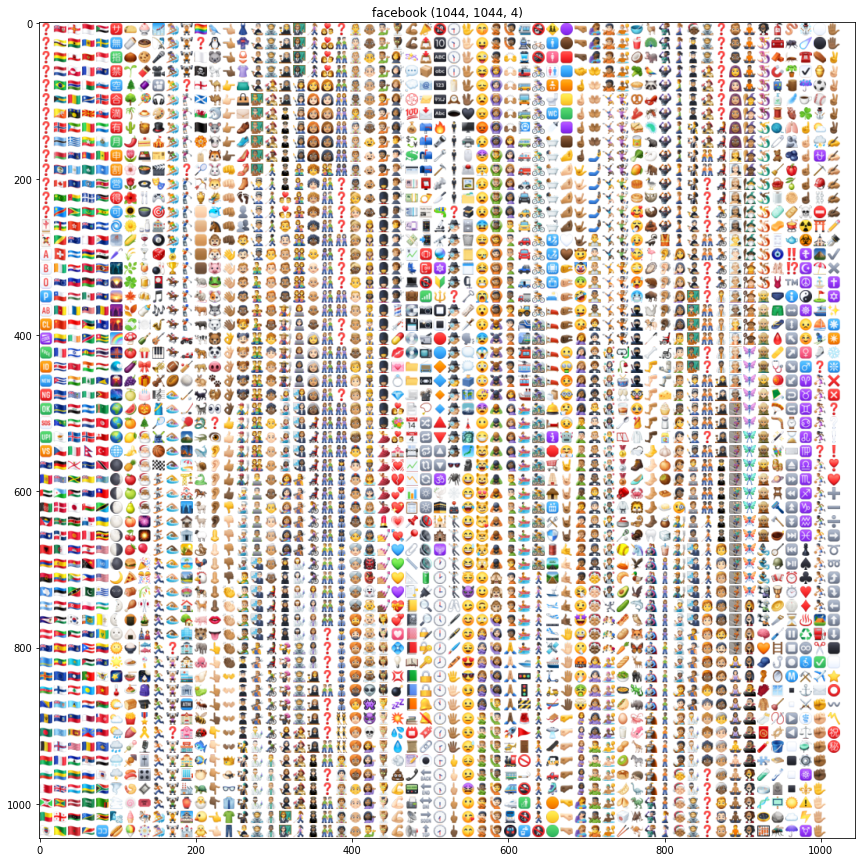

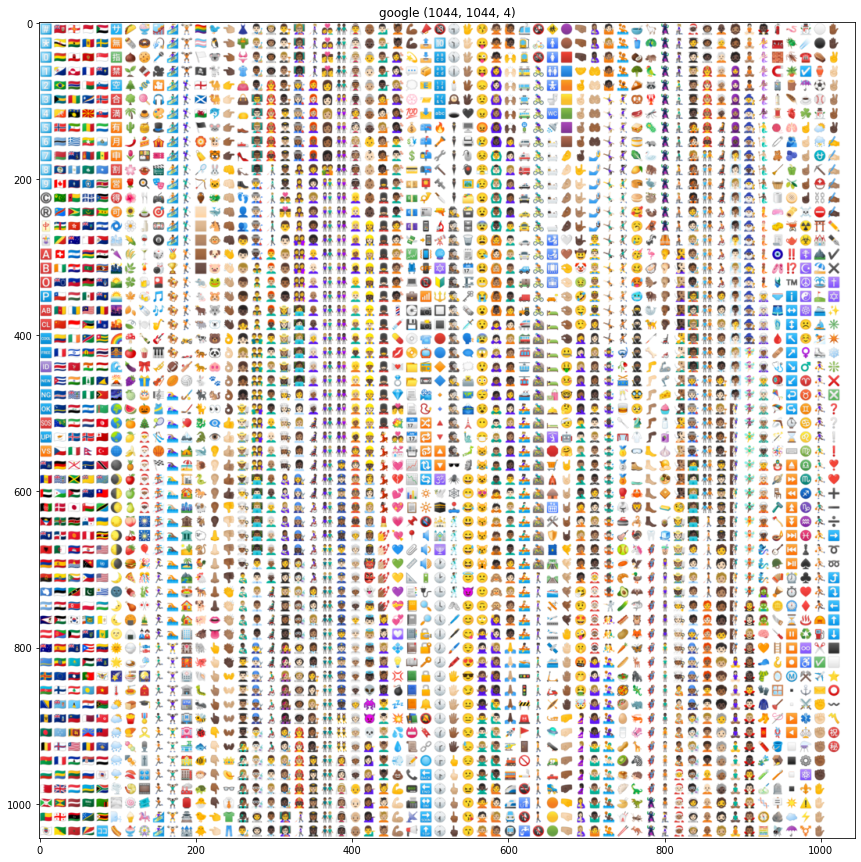

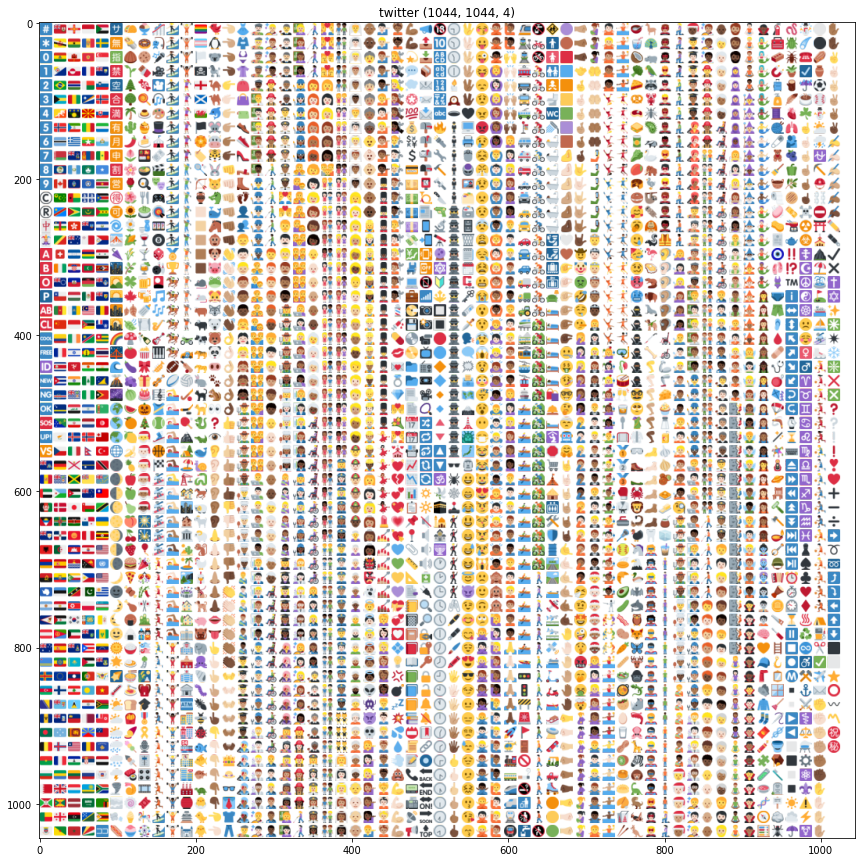

In [ ]:
for i in range(len(IMAGES)):
    plt.figure(figsize=(25,15))
    plt.imshow(IMAGES[i])
    h, w, c = IMAGES[i].shape
    plt.title(VENDOR[i] + ' (%i, %i, %i)' % (h, w, c))

**Writing code** to generate the same four plots as above, except use Numpy slicing to display only the first 3 rows and 8 columns of the sheet. To ensure you do not crop any emojis, take note of any "padding" between the 16x16 emojis in the sheet.

(If you see a red question mark like <span style="color:red">?</span> for a vendor, it means they do not provide that particular emoji.)

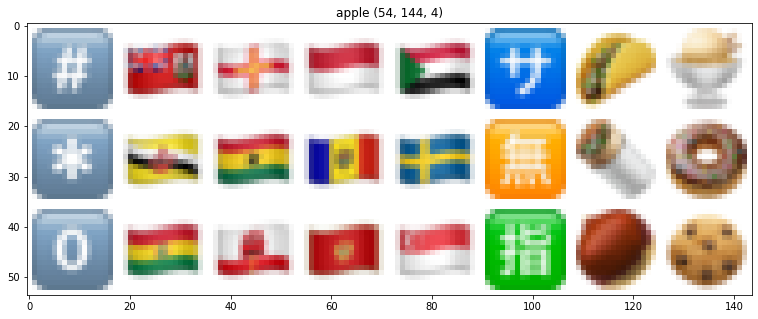

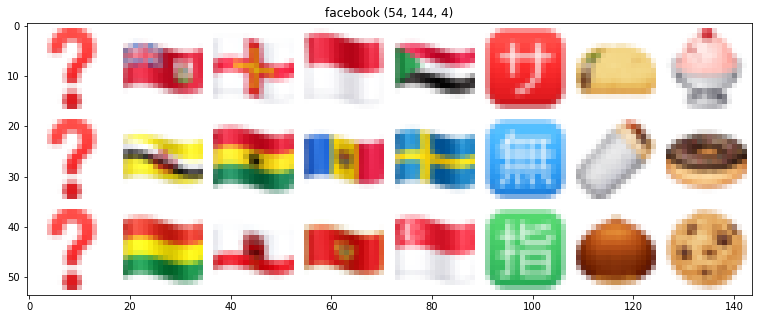

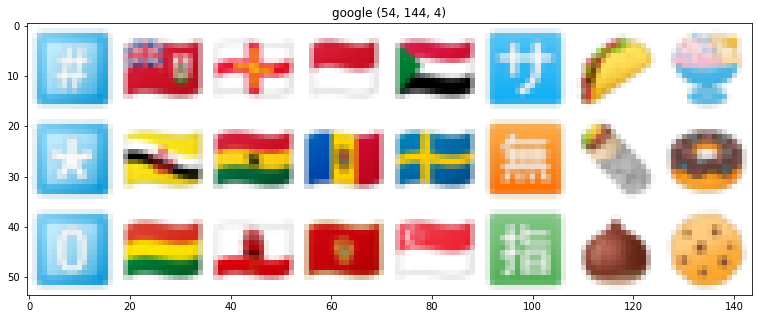

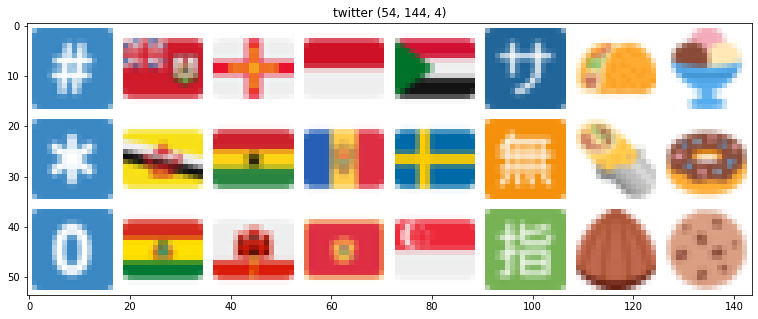

In [ ]:
PADDING = 2

for i in range(len(IMAGES)):
    plt.figure(figsize=(15,5))
    plt.imshow(IMAGES[i][:3*(EMOJI_SIZE+PADDING),:8*(EMOJI_SIZE+PADDING)])
    h, w, c = IMAGES[i][:3*(EMOJI_SIZE+PADDING),:8*(EMOJI_SIZE+PADDING)].shape
    plt.title(VENDOR[i] + ' (%i, %i, %i)' % (h, w, c))

**Implementing *get_emoji_image*.** This function extracts a 16x16 RGBA emoji image by its style index (0=*apple*, 1=*facebook*, 2=*google*, 3=*twitter*) and emoji index (as they appear in *emoji.json*).

In [ ]:
def get_emoji_image(style_index, emoji_index):
    """
    Given a vendor style index (apple=0,facebook=1,google=2,twitter=3)
    and an emoji index, returns the 16x16 RGBA image as a Numpy array
    with shape (16,16,4).
    """
    x_coord = EMOJI_METADATA[emoji_index]['sheet_x'] # get x_coord from metadata
    y_coord = EMOJI_METADATA[emoji_index]['sheet_y'] # get y_coord from metadata
    # we return the array from IMAGES for style_index
    # pixel used will be from the sheet_x coord * (16 + 2) 16 for all emoji size and 2 for each padding
    # up to sheet_x + 1 * same distance again
    # we add 1 and substract 1 from the range for x and y
    # to return a 16,16,4 instead of 18,18,4

    # we reverse x/y coords bc of numpy in 2d taking the axis y first
    # also index are reversed
    x_start = y_coord*(EMOJI_SIZE+PADDING)+1
    x_end = (y_coord+1)*(EMOJI_SIZE+PADDING)-1
    y_start = x_coord*(EMOJI_SIZE+PADDING)+1
    y_end = (x_coord+1)*(EMOJI_SIZE+PADDING)-1

    # the 4 above line could all be written in the return directly but it's less clean
    return IMAGES[style_index][x_start:x_end, y_start:y_end,:]

This function is to create titles that show the emoji index, the emoji short name, and the vendor title above each style.

In [ ]:
def plot_emoji_styles(emoji_index):
    """Plots all four vendor styles of the given emoji."""
    plt.figure(figsize=(15,5))
    for i in range(len(IMAGES)):
        plt.subplot(1, 4, i+1)
        plt.imshow(get_emoji_image(i, emoji_index))
        plt.suptitle('%i %s' % (emoji_index, EMOJI_METADATA[emoji_index]['short_name']), y=0.85)
        plt.title(VENDOR[i])

**Running *plot_emoji_styles*** function to plot the '*laughing*' emoji from **1b** and a few more examples.

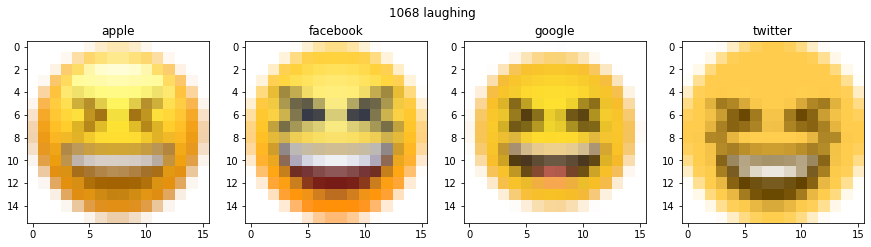

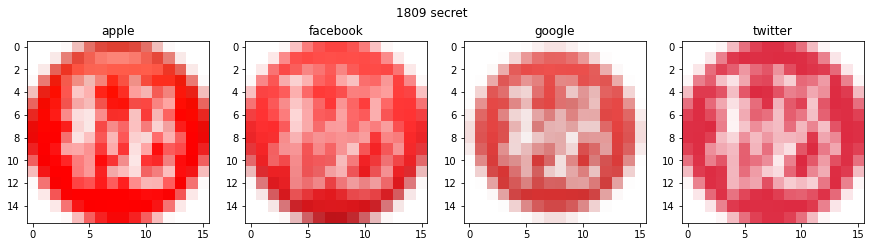

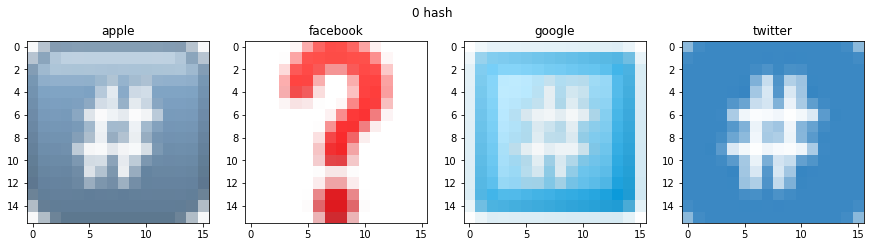

In [ ]:
plot_emoji_styles(META_LAUGHING)
plot_emoji_styles(len(EMOJI_METADATA)-1)
plot_emoji_styles(0)

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 2 &mdash; Building an emoji data set for machine learning

This part is about converting your list of four raw image sheets into a data set suitable for training with scikit-learn. 

<div style="border-bottom: 1px solid black;"></div>

### *2a &mdash;  Building a set of inputs $\boldsymbol{X}$ from the sheet images*

**Write code** to build a Numpy array of inputs $\boldsymbol{X}$ having dtype *float32* and shape $(N,D)$ where $N$ is the total number of emoji images (number of emojis $\times$ number of vendors) and $D$ is the total number of pixels per emoji (height $\times$ width $\times$ channels). Each image should be converted from RGBA (4 channels) to RGB (3 channels) using the *rgba_to_rgb* function defined at the top of this lab. The first rows of $\boldsymbol{X}$ should all be apple emojis, followed by all facebook emojis, then all google emojis, and finally the last rows should be all twitter emojis. <span style="color:#080;font-weight:bold">Briefly comment each non-trivial line of your code.</span>

In [ ]:
# 16*16 is the emoji size
# 3 is the number of channels
X = np.random.random((len(EMOJI_METADATA) * 4, 16*16*3))

# loop for each vendor and each emoji
for i in range(len(VENDOR)):
    for index, emoji in enumerate(EMOJI_METADATA):
            image = get_emoji_image(i, index) # i is the style number
            image = rgba_to_rgb(image) # convert to 3 channels
            image = image.flatten()
            X[index + i* len(EMOJI_METADATA)] = image # one big array for all emojis style etc

print(X.shape)

(7240, 768)


<div style="border-bottom: 1px solid black;"></div>

### *Q2b &mdash;  Building a set of targets $\boldsymbol{y}$ from the metadata*

Here we enumerate the distinct emoji categories, and then build a vector of integer targets $\boldsymbol{y}$.

**Writing code** to get a list of distinct emoji categories, using the *category* field from the metadata; ensure that the list of categories is displayed when the code cell below is executed.

In [ ]:
EMOJI_CATEGORIES = list(set([data["category"] for data in EMOJI_METADATA])) # use set to remove dups
print(EMOJI_CATEGORIES)

['Activities', 'Animals & Nature', 'Travel & Places', 'People & Body', 'Symbols', 'Objects', 'Food & Drink', 'Skin Tones', 'Smileys & Emotion', 'Flags']


**Writing code** to build a Numpy array of inputs $\boldsymbol{y}$ having dtype *int32* and where $y_i \in \{0, \ldots, M-1\}$ with $M$ being the number of distinct emoji categories. The order of items in $\boldsymbol{y}$ should match those of $\boldsymbol{X}$ from **2a**. You may use any approach you like, but potentially useful functions include the *list* object's **[index](https://docs.python.org/3/tutorial/datastructures.html)** function and Numpy's **[np.tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html)** function.

In [ ]:
CATEGORY_INDEX = {category:index for index, category in enumerate(EMOJI_CATEGORIES)} # get the category order/index from previous cell obj
y = [CATEGORY_INDEX[data["category"]] for data in EMOJI_METADATA] * 4

**Writing code** to demonstrate that, for each $i$ that corresponds to a '*laughing*' emoji (for apple, facebook, google, twitter), its $y_i$ label is set to be the index of the "Smileys & Emotion" category.

In [ ]:
for i in range(len(VENDOR)):
    category_index = y[META_LAUGHING + i*len(EMOJI_METADATA)] # index
    print(EMOJI_CATEGORIES[category_index]) # category

Smileys & Emotion
Smileys & Emotion
Smileys & Emotion
Smileys & Emotion


<div style="border-bottom: 1px solid black;"></div>

### *2c &mdash;  Spliting and preprocessing the data*

**Writing code** to randomly split $(\boldsymbol{X}, \boldsymbol{y})$ into three parts, with no overlap:
1. a *training* set $(\boldsymbol{X}_\text{trn}, \boldsymbol{y}_\text{trn})$, which you will use to directly train classifiers
2. a *validation* set $(\boldsymbol{X}_\text{val}, \boldsymbol{y}_\text{val})$, which you will use to estimate the best value for a hyperparameter
3. a *test* set $(\boldsymbol{X}_\text{tst}, \boldsymbol{y}_\text{tst})$, which you will use to evaluate final performance of the 'best' hyperparameters

The training data comprises 60% of the full data set. The validation and testing data each comprise 20% of the original data. 

In [ ]:
from sklearn.model_selection import train_test_split

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.6, random_state=0)
X_tst, X_val, y_tst, y_val = train_test_split(X_tst, y_tst, train_size=0.5, random_state=0)

**Writing code** to normalize the features of $\boldsymbol{X}_\text{trn}$, $\boldsymbol{X}_\text{val}$, and $\boldsymbol{X}_\text{tst}$, using scikit-learn's **[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**. Be careful which subset of the data you use for estimating the *StandardScaler* object's *scale_* and *mean_* attributes.

In [ ]:
from sklearn.preprocessing import StandardScaler

X_trn_ = StandardScaler().fit(X_trn).transform(X_trn)
X_val_ = StandardScaler().fit(X_val).transform(X_val)
X_tst_ = StandardScaler().fit(X_tst).transform(X_tst)

**Plotting a scaled and unscaled emoji side-by-side.** We choose a row from $\boldsymbol{X}_\text{trn}$ and show how it appears as an RGB image with and without scaling.

*Note:* We do not need to know which row in $\boldsymbol{X}_\text{trn}$ corresponds to which row in $\boldsymbol{X}$. Instead we can "undo" the scaling on whatever row we pick, using one of the methods provided by *StandardScaler*.

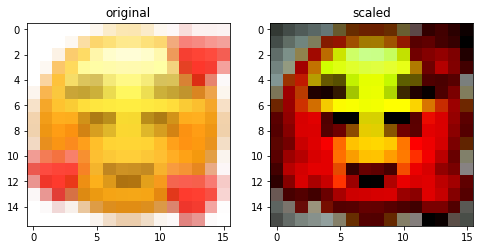

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(X_trn[200].reshape(16, 16, 3))

plt.subplot(1, 2, 2)
plt.title('scaled')
plt.imshow(np.clip(X_trn_[200].reshape((16, 16, 3)), 0, 1))

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 3 &mdash; Training classifiers and identifying good hyperparameters

This part has several goals:
1. Help visualize how hyperparameters affect training/validation/test performance.
2. Give a sense for how long certain classifiers take to train or to make predictions.
3. Force us to try two useful Python features: (a) passing types as arguments, and (b) argument forwarding.

<div style="border-bottom: 1px solid black;"></div>

### *3a &mdash;  Writing a function to trains multiple estimators*

Throughout **3**, we will be training multiple estimators, each with a different hyperparameter setting.

**Implementing the *train_estimators* utility function.** The idea of this function is to make it easy to train multiple versions of an estimator where a single hyperparameter (specified by *param_name*) takes on a different value (specified by *param_vals*) for each estimator. See the docstring below.

In [ ]:
def train_estimators(X, y, estimator_type, param_name, param_vals, **kwargs):
    """
    Trains multiple instances of `estimator_type` on (X, y) by setting argument
    named `param_name` to each value in `param_vals`. Prints a message before
    training each instance. Returns the list of trained estimators.
    
    For example:
    
       >>> train_estimators(X, y, DecisionTreeClassifier, 'max_depth', [1, 5, 10],
                            splitter='random', random_state=0)
    
       Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...

       [DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')] 
    """
    all_models = []
    
    for param in param_vals:
        kwargs.update({param_name:param})
        model = estimator_type(**kwargs).fit(X, y)
        all_models.append(model)
    
    return all_models

**Run the code cell below** to test the implementation of *train_estimators*.

In [ ]:
tree_estimators = train_estimators(X_trn, y_trn, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [1, 5, 10], splitter='random', random_state=0)
tree_estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='random'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='random'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=10, max_features=None, max_lea

<div style="border-bottom: 1px solid black;"></div>

### *3b &mdash;  Training multiples models, plotting their accuracies, and identifying good parameters*

**Implementing the *score_estimators* utility function.** This will be handy for scoring a list of estimators on a particular data set, such as $(\boldsymbol{X}_\text{trn}, \boldsymbol{y}_\text{trn})$. Using the estimator's own *score* method.

In [ ]:
def score_estimators(X, y, estimators):
    """Scores each estimator on (X, y), returning a list of scores."""
    return [estimator.score(X, y) for estimator in estimators]

**Run the code cell below** to test the implementation. It should print three scores per dataset. Each score is a measure of classification accuracy.

In [ ]:
print("train:   ", score_estimators(X_trn, y_trn, tree_estimators))
print("validate:", score_estimators(X_val, y_val, tree_estimators))
print("test:    ", score_estimators(X_tst, y_tst, tree_estimators))

train:    [0.3031767955801105, 0.5234806629834254, 0.7513812154696132]
validate: [0.324585635359116, 0.5020718232044199, 0.5345303867403315]
test:     [0.305939226519337, 0.5220994475138122, 0.5545580110497238]


**Run the code cell below** to see a demonstration of the `%%time` feature of Jupyter (see [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)). Note that `%%time` only works if it is the first line in a code cell, before comments.

In [ ]:
%%time
for i in range(1000000):  # Burn some CPU cycles in a
    pass                  # loop that does nothing

CPU times: user 45.2 ms, sys: 0 ns, total: 45.2 ms
Wall time: 49.5 ms


**Training multiple *DecisionTreeClassifier*s** on the training set, such that *train_estimators* produces the following output:

    Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=100, random_state=0, splitter='random')...

In [ ]:
%%time

dtc_estimators = train_estimators(X_trn_, y_trn, sklearn.tree.DecisionTreeClassifier, 
                          'max_depth', [1 , 5, 10, 20, 50, 100], 
                          splitter='random', random_state=0)

for estimator in dtc_estimators:
    print("Training", estimator)

Training DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')
Training DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')
Training DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=No

**Implementinging *plot_estimator_scores*** to visualize the effect of the parameter on accuracy.

In [ ]:
def plot_estimator_scores(estimators, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    acc_trn = score_estimators(X_trn_, y_trn, estimators)
    acc_val = score_estimators(X_val_, y_val, estimators)
    acc_tst = score_estimators(X_tst_, y_tst, estimators)
    
    plt.text(70, 0.4, "train = %.3f" % max(acc_trn), color='green')
    plt.text(70, 0.3, "validate = %.3f" % max(acc_val), color='red')
    plt.text(70, 0.2, "test = %.3f" % max(acc_tst))
    
    fake_x_val = np.arange(0, 120, 20)
    print(acc_val)
    
    tempIndex = 0
    
    for i in range(len(acc_tst)-1):
        errorNext = acc_val[i+1]-acc_tst[i+1]
        error = acc_val[i]-acc_tst[i]
        if(errorNext < error):
            tempIndex = i+1
            
    print(tempIndex)
    
    plt.text(fake_x_val[tempIndex]-2, acc_tst[tempIndex]-0.03,'X', color='red', fontsize=20)
    
    plt.plot(fake_x_val, acc_trn, 'go-', label='train')
    plt.plot(fake_x_val, acc_val, 'ro-', label='validate')
    plt.plot(fake_x_val, acc_tst, color='black', linestyle='dashed', label='test')
    
    title = f"{estimators[0].__class__.__name__} score vs {param_name}"
    plt.title(title)
    
    plt.xlabel(param_name)
    plt.xticks(fake_x_val, param_vals)
    plt.ylabel("score")
    
    plt.ylim(0, 1.1)
    
    plt.legend(loc='upper left')
    
    plt.show()

**Plotting the *DecisionTreeClassifier* scores** by calling your *plot_estimator_scores* function.

[0.3238950276243094, 0.5034530386740331, 0.5048342541436464, 0.5262430939226519, 0.5338397790055248, 0.5338397790055248]
3


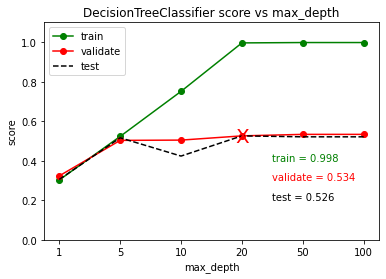

CPU times: user 253 ms, sys: 6.98 ms, total: 260 ms
Wall time: 262 ms


In [ ]:
%%time
plot_estimator_scores(dtc_estimators, "max_depth", [1 , 5, 10, 20, 50, 100])

**Training multiple *RandomForestClassifiers*** such that *train_estimators* produces the following output:

    Training RandomForestClassifier(max_depth=1, random_state=0)...
    Training RandomForestClassifier(max_depth=5, random_state=0)...
    Training RandomForestClassifier(max_depth=10, random_state=0)...
    Training RandomForestClassifier(max_depth=20, random_state=0)...
    Training RandomForestClassifier(max_depth=50, random_state=0)...
    Training RandomForestClassifier(max_depth=100, random_state=0)...

In [ ]:
%%time
rf_estimators = train_estimators(X_trn_, y_trn, sklearn.ensemble.RandomForestClassifier, 
                          'max_depth', [1 , 5, 10, 20, 50, 100], 
                           random_state=0)

for estimator in rf_estimators:
    print("Training", estimator)

Training RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Training RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                     

**Plotting the *RandomForestClassifier* scores**, again by calling *plot_estimator_scores* function.

[0.4005524861878453, 0.5642265193370166, 0.6795580110497238, 0.6988950276243094, 0.6926795580110497, 0.6926795580110497]
4


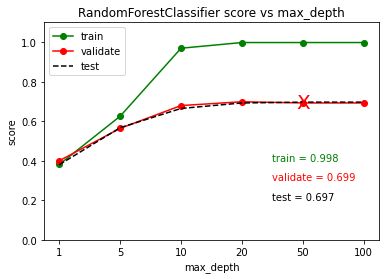

CPU times: user 1.37 s, sys: 12 ms, total: 1.38 s
Wall time: 1.38 s


In [ ]:
%%time
plot_estimator_scores(rf_estimators, "max_depth", [1 , 5, 10, 20, 50, 100])

**Training multiple *LogisticRegression* classifiers** such that *train_estimators* produces the following output:

    Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
    Training LogisticRegression(max_iter=10000, random_state=0)...
    
The omission of *C* when the final estimator was printed means it was trained with its default value, which is *C*=1. You can try it yourself:
```python
>>> LogisticRegression(C=1.01)
LogisticRegression(C=1.01)

>>> LogisticRegression(C=1.0)
LogisticRegression()
```

In [ ]:
%%time
lr_estimators = train_estimators(X_trn_, y_trn, sklearn.linear_model.LogisticRegression, 
                          'C', [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                            max_iter=10000, 
                            random_state=0)

for estimator in lr_estimators:
    print("Training", estimator)

Training LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_star

**Plotting the *LogisticRegression* scores**, again by calling *plot_estimator_scores* function.

[0.4233425414364641, 0.5331491712707183, 0.5821823204419889, 0.5904696132596685, 0.5863259668508287, 0.5649171270718232]
3


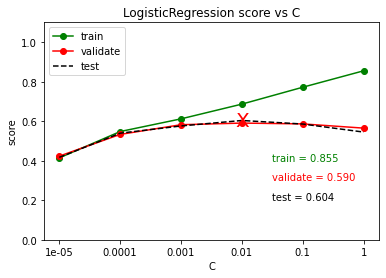

CPU times: user 445 ms, sys: 172 ms, total: 617 ms
Wall time: 369 ms


In [ ]:
%%time
plot_estimator_scores(lr_estimators, "C", [1e-05, 0.0001, 0.001, 0.01, 0.1, 1])

**Training multiple SVM classifiers (*SVC*)** such that *train_estimators* produces the following output:

    Training SVC(C=0.01, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=0.1, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=10.0, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=100.0, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=1000.0, gamma=0.001, max_iter=10000, random_state=0)...

In [ ]:
%%time
svm_estimators = train_estimators(X_trn_, y_trn, sklearn.svm.SVC, 
                          'C', [0.01, 0.1, 1, 10, 100, 1000],
                            gamma=0.001,
                            max_iter=10000,
                            random_state=0)

for estimator in svm_estimators:
    print("Training", estimator)

Training SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=10000, probability=False, random_state=0, shrinking=True,
    tol=0.001, verbose=False)
Training SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=10000, probability=False, random_state=0, shrinking=True,
    tol=0.001, verbose=False)
Training SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=10000, probability=False, random_state=0, shrinking=True,
    tol=0.001, verbose=False)
Training SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=10000, probability=False, random_state=0, shrinking=True,
    

**Plotting the *SVM* scores**, again by calling *plot_estimator_scores* function. Predictions may take several minutes to compute.

[0.38328729281767954, 0.5697513812154696, 0.6823204419889503, 0.7279005524861878, 0.7216850828729282, 0.7182320441988951]
3


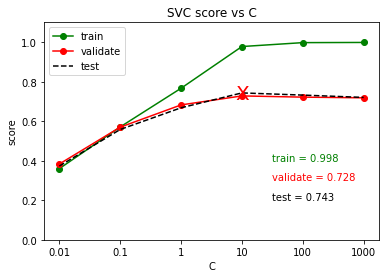

CPU times: user 3min 22s, sys: 17.7 ms, total: 3min 22s
Wall time: 3min 22s


In [ ]:
%%time
plot_estimator_scores(svm_estimators, "C", [0.01, 0.1, 1, 10, 100, 1000])

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 4 &mdash; Visualizing mistakes

The goal here is to visualize classification errors, by confusion matrix and by inspecting typical mistakes.

<div style="border-bottom: 1px solid black;"></div>

### *4a &mdash;  Plotting a confusion matrix for the best estimators*

**Writing code** to plot a confusion matrix for each of the 'best' estimators in **3** when applied to test set $(\boldsymbol{X}_\text{tst}, \boldsymbol{y}_\text{tst})$. Here, 'best' means best validation score. All estimators are already trained, so we can simply pull out the one best of each type {tree, forest, logistic, svm}.

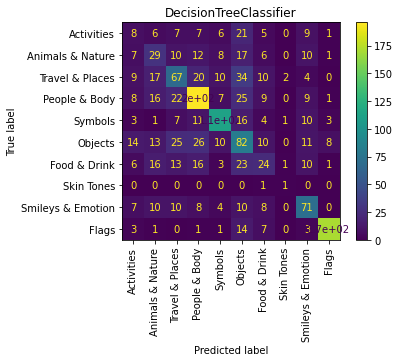

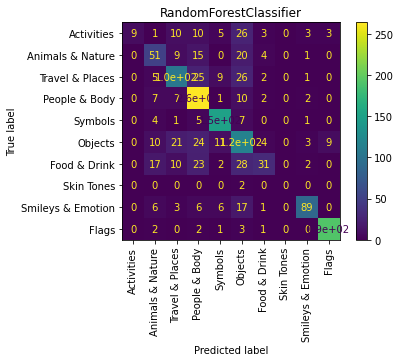

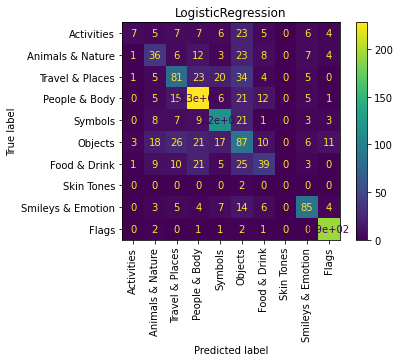

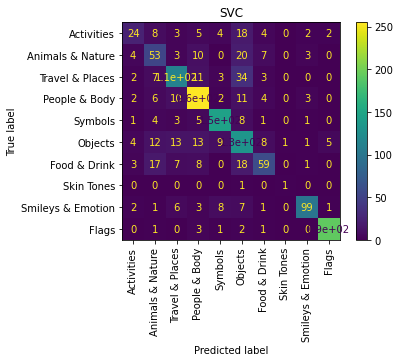

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc_estimators[3], X_tst_, y_tst, display_labels=EMOJI_CATEGORIES, xticks_rotation='vertical')
plt.title(dtc_estimators[0].__class__.__name__)
plt.show()

plot_confusion_matrix(rf_estimators[4], X_tst_, y_tst, display_labels=EMOJI_CATEGORIES, xticks_rotation='vertical')
plt.title(rf_estimators[0].__class__.__name__)
plt.show()

plot_confusion_matrix(lr_estimators[3], X_tst_, y_tst, display_labels=EMOJI_CATEGORIES, xticks_rotation='vertical')
plt.title(lr_estimators[0].__class__.__name__)
plt.show()

plot_confusion_matrix(svm_estimators[3], X_tst_, y_tst, display_labels=EMOJI_CATEGORIES, xticks_rotation='vertical')
plt.title(svm_estimators[0].__class__.__name__)
plt.show()

<div style="border-bottom: 1px solid black;"></div>

### *4b &mdash;  Identifying specific misclassified examples*

Here we use the "best performing" classifier at the end of **4a**.

**Writing code** to identify all "*Objects* misclassified as *Flags*" from the test-set and then plotting them as images. (The phrase "*A* misclassified as *B*" means the prediction was *B* but the true class was *A*.)

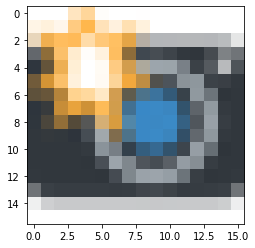

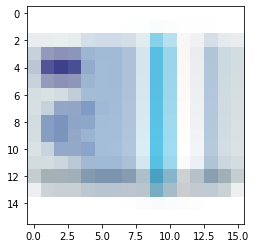

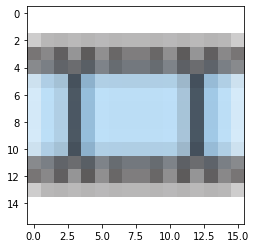

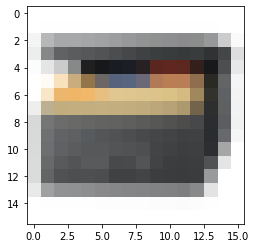

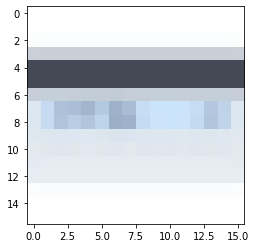

<Figure size 432x288 with 0 Axes>

In [ ]:
y_pred = list(svm_estimators[3].predict(X_tst_))

for index, (i,j) in enumerate (zip(y_pred, y_tst)):
    if i == 9 and j == 5: # this is the index in the confusion matrix for the Objects misclassified as Flags
        plt.imshow(X_tst[index].reshape(16, 16, 3))
        plt.figure()

After seeing the failure cases above, we can guess why the estimator is confusing them with *Flags*?

The above objects look like rectangle with a logo ressembling a flag.
They are all rectangles with white space under and at the top

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 5 &mdash; Visualizing feature importances

The goal here is to visualize sensitivity to specific input features.

<div style="border-bottom: 1px solid black;"></div>

### *5a &mdash;  Visualizing the feature importances of a RandomForestClassifier*

**Implementing *plot_random_forest_importances*** below. This function plots the *feature_importances_* attribute of a *RandomForestClassifier* (see scikit-learn docs). For the random forests we trained, there are $16 \times 16 \times 3$ features, so to make visualization easy the feature importances are organized into three separate side-by-side heatmaps: one for each RGB colour channel.

In [ ]:
def plot_random_forest_importances(estimator):
    """
    Plots the feature importances of the given RandomForestClassifier,
    arranged as three separate 16x16 heatmaps for (red, green, blue).
    """
    titles = ['R', 'G', 'B']
    
    feature_importances = estimator.feature_importances_
    rgb_arr = feature_importances.reshape(16,16,3)
    for j in range (3):
        plt.subplot(1,3,j+1)
        plt.imshow(rgb_arr[:,:,j], cmap='cool')
        plt.title(titles[j])
        plt.axis('off')


**Verifying the code** by calling the function to plot the feature importances of first *RandomForestClassifier* that we trained (with *max_depth*=1).

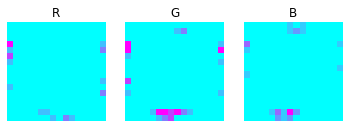

In [ ]:
plot_random_forest_importances(rf_estimators[0])

**Plotting the feature importances** for the 'best' *RandomForestClassifier* instance. The patterns should be more complex.

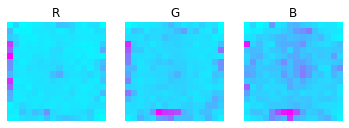

In [ ]:
plot_random_forest_importances(rf_estimators[4]) #4 was best

Here we question ourselves on why do the features near the edge of the image so 'important'?

Because the edges is where the padding is at, to differentiate where an emoji ends and some emojis are not full
The white will throw off estimations, very noisy area

<div style="border-bottom: 1px solid black;"></div>

### *5b &mdash;  Visualizing the feature weights of LogisticRegression*

This question is essentially the same as **5a** except we will extract the per-class weights of a *LogisticRegression* estimator that was trained on emoji images.

**Implementing *plot_logistic_weights*** so that for each of the 10 categories of emoji it plots three side-by-side images.  Using the *coef_* attribute of *LogisticRegression* to extract the $16 \times 16 \times 3$ weights for each category, and then generate a separate heatmap for each RGB channel. Since we want to see clearly which weights are positive or negative, use *cmap*='bwr' when plotting each heatmap. Use *suptitle* to label each group of heatmaps with its category label. The function should generate $10 \times 3$ heatmaps total.

In [ ]:
def plot_logistic_weights(estimator):
    """
    Plots heatmaps showing the weights of the LogisticRegression estimator,
    with a separate plot for each class and for each colour channel.
    """
    assert isinstance(estimator, sklearn.linear_model.LogisticRegression)
    titles = ['R', 'G', 'B']
    
    weights = estimator.coef_
    print(weights.shape)
    for i in range (len(estimator.classes_)):
        plt.suptitle(EMOJI_CATEGORIES[i], y=0.8)
        rgb_arr = weights[i].reshape(16,16,3)
        for j in range(3):
            plt.subplot(1,3, j+1)
            plt.imshow(np.clip(rgb_arr[:,:,j], 0, 1), cmap='bwr')
            plt.title(titles[j])
            plt.axis('off')
        plt.figure()

**Verifying the code** by calling the function to plot the weights of the *LogisticRegression* classifier having *strongest* regularization (the one with *C*=1e-5).

(10, 768)


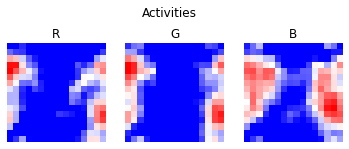

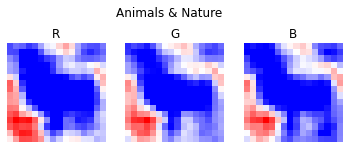

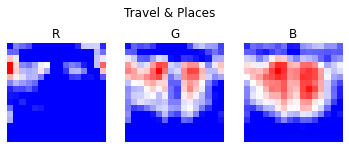

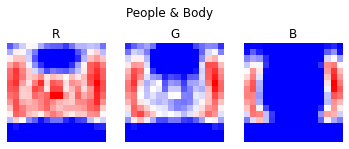

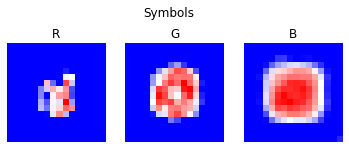

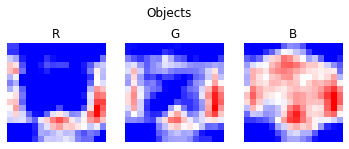

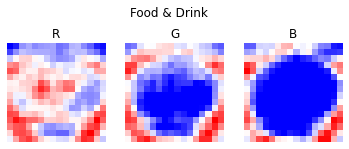

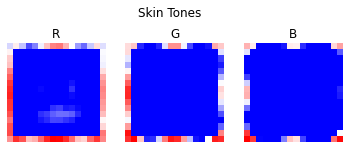

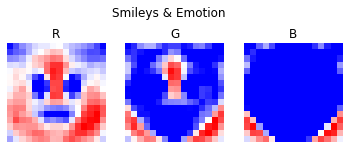

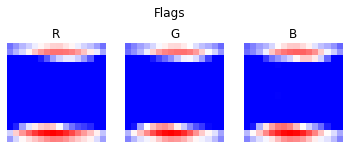

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_logistic_weights(lr_estimators[0])

**Plotting the weights** of the 'best' *LogisticRegression* instance.

(10, 768)


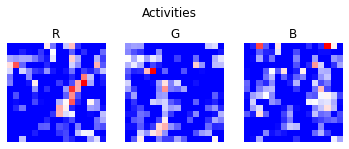

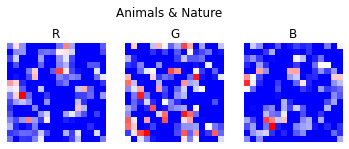

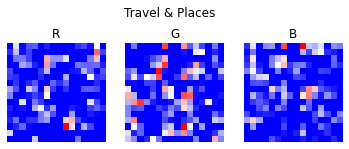

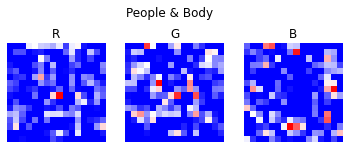

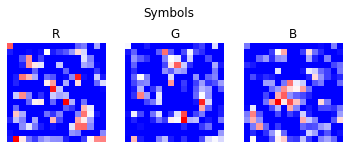

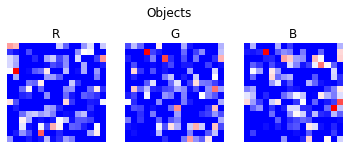

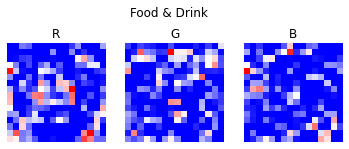

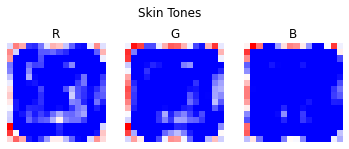

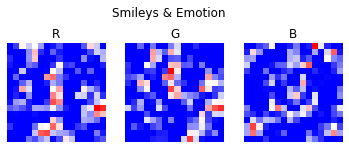

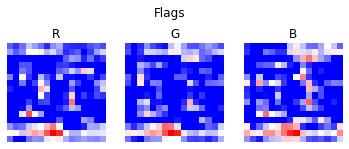

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_logistic_weights(lr_estimators[3])

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 6 &mdash; Generating Python code for a tree

The goal here is to develop a deeper understanding of scikit-learn's decision tree and data structure, by generating an equivalent Python program, compiling it, and executing it.

true: [3, 5, 6, 9]
pred: [3 5 6 5]


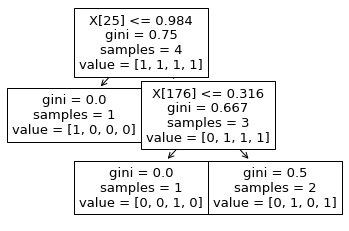

In [ ]:
# Train a tiny tree on a tiny training set of only 4 instances
X_tiny = X_trn[:4]
y_tiny = y_trn[:4]
tiny_tree = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=0).fit(X_tiny, y_tiny)

# Plot the tree and print the true and predicted labels
sklearn.tree.plot_tree(tiny_tree)
print("true:", y_tiny)
print("pred:", tiny_tree.predict(X_tiny))

The above is meant as a simple easy-to-understand tree, much simpler than the real ones you trained in **3**.

**Run the code cell below** to see a function that traverses a *DecisionTreeClassifier*'s internal tree data structure and prints a message each time it encounters a split node or a leaf node. Notice how it corresponds to the plotted tree above.

In [ ]:
def print_tree(tree):
    """Prints the structure of a DecisionTreeClassifier."""
    assert isinstance(tree, sklearn.tree.DecisionTreeClassifier)

    # Shorthand for some tree attributes
    left = tree.tree_.children_left     # left[i]: index of left  node when i is a split
    right = tree.tree_.children_right   # right[i]: index of right node when i is a split
    feature = tree.tree_.feature        # feature[i]: index feature to test when i is a split
    threshold = tree.tree_.threshold    # threshold[i]: threshold to use when i is a split
    votes = tree.tree_.value            # votes[i,j]: number of training examples to reach
                                        #             node i while having class index j

    def visit_subtree(i, depth):
        indent = "  "*depth
        if left[i] != right[i]:
            print("%snode %d: split on x[%d] <= %f" % (indent, i, feature[i], threshold[i]))
            visit_subtree(left[i],  depth+1)
            visit_subtree(right[i], depth+1)
        else:
            label = tree.classes_[np.argmax(votes[i])]
            print("%snode %d: leaf label %d" % (indent, i, label))
            
    visit_subtree(0, 0)
    
print_tree(tiny_tree)

node 0: split on x[25] <= 0.983760
  node 1: leaf label 3
  node 2: split on x[176] <= 0.316417
    node 3: leaf label 6
    node 4: leaf label 5


**Calling *print_tree* on the best *DecisionTreeClassifier*** from **3**. (The output will be very long.)

In [ ]:
print_tree(dtc_estimators[3])

node 0: split on x[193] <= 0.281792
  node 1: split on x[742] <= 0.773857
    node 2: split on x[532] <= -0.059167
      node 3: split on x[619] <= -0.135204
        node 4: split on x[311] <= 0.463921
          node 5: split on x[131] <= -0.630238
            node 6: split on x[686] <= -1.243356
              node 7: split on x[71] <= -0.350052
                node 8: split on x[10] <= 0.329462
                  node 9: split on x[522] <= 0.224835
                    node 10: split on x[168] <= -0.575970
                      node 11: split on x[425] <= 0.408715
                        node 12: split on x[240] <= 0.228530
                          node 13: split on x[305] <= 0.793287
                            node 14: split on x[104] <= -2.078035
                              node 15: split on x[187] <= -1.671061
                                node 16: leaf label 4
                                node 17: leaf label 7
                              node 18: leaf label 4
            

**Implementing the *tree_to_code* function below.** The idea is to transform a *DecisionTreeClassifier* instance into equivalent Python code, where the code is built up as a string.

For example, if we called it with the *tiny_tree* from earlier, it might produce a string like below (although not necessarily an identical program, depending on the training set for *tiny_tree*).

```
>>> print(tree_to_code(tiny_tree))
def predict(x):
  if x[395] <= -0.642489:
    if x[174] <= -0.988780:
      return 4
    else:
      return 7
  else:
    return 0
```

In [ ]:
def tree_to_code(tree):
    """
    Given a *DecisionTreeClassifier*, returns a string that
    defines a Python function that corresponds to how the
    decision tree makes predictions. The first line of the
    string is:
    
         "def predict(x):\n..."
         
    followed by lines of code for the logic of the tree.
    """
    left = tree.tree_.children_left     # left[i]: index of left  node when i is a split
    right = tree.tree_.children_right   # right[i]: index of right node when i is a split
    feature = tree.tree_.feature        # feature[i]: index feature to test when i is a split
    threshold = tree.tree_.threshold    # threshold[i]: threshold to use when i is a split
    votes = tree.tree_.value            # votes[i,j]: number of training examples to reach
                                        #             node i while having class index j
    queue_leaf = []
    queue = []
    def visit_subtree(i, depth, rhs):
        indent = "  "*depth
        if left[i] != right[i]:
            queue.append("%sif x[%d] <= %f:" % (indent, feature[i], threshold[i]))
            visit_subtree(left[i],  depth+1, False)
            visit_subtree(right[i], depth+1, True)
        else:
            label = tree.classes_[np.argmax(votes[i])]
            if not rhs:
                if depth == 1:
                    else_indent = ''
                else:
                    else_indent = "  "*(depth - 1)
                queue.append("%sreturn %d" % (indent, label))
                queue.append("%selse:" % else_indent)
            else:
                queue.append("%sreturn %d" % (indent, label))
            
    visit_subtree(0, 0, False)
    stack = list(reversed(queue_leaf))
    
    s = ''
    for i in queue:
        s+= i+"\n"
        #print(i)
    for j in stack:
        s+= j+"\n"
        #print(j)
    return s

**Run the code cell below** to check the implementation. We should see a program equivalent to the tiny decision tree we plotted earlier.

In [ ]:
print(tree_to_code(tiny_tree))

if x[25] <= 0.983760:
  return 3
else:
  if x[176] <= 0.316417:
    return 6
  else:
    return 5



**Run the code cell below** to define a utility function called *compile_func*. What this function does is it takes a string containing a single Python function definition, and compiles it, returning a *function* object that can be called to execute the code represented by the string.

In [ ]:
def compile_func(python_code):
    """
    Compiles a string defining a Python function, and returns
    a reference to the callable function object that results.
    """
    symbols = {}                             # Dictionary to collect symbols that get defined.
    exec(python_code, None, symbols)         # Execute the string as if it were code.
    assert len(symbols) == 1, "Expected python_code to define a function"
    function = next(iter(symbols.values()))  # Get reference to the object that was defined.
    assert callable(function), "Expected python_code to define a function"
    return function

**Run the code cell below** to see a demo of how *compile_func* works.

In [ ]:
example_code = """
def square(x):
    return x**2
"""

example_func = compile_func(example_code)
print(example_func)

for i in range(5):
    print(example_func(i))

<function square at 0x7f865447f0e0>
0
1
4
9
16
